In [1]:
from PIL import Image, ImageFilter, ImageOps
from matplotlib import pyplot as plt
import numpy as np

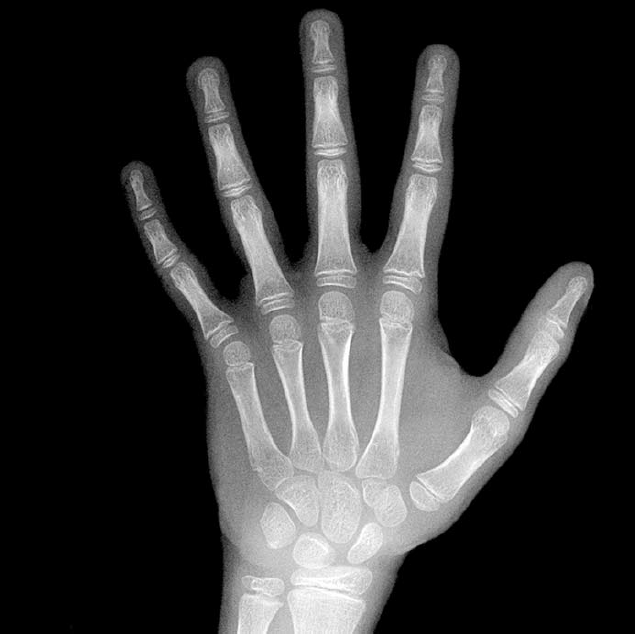

In [2]:
rtg = Image.open('RTG/B/bez/11y_b.PNG')
rtg

In [3]:
# Převedeme obrázek z RGBA na odstíny šedi
rtg = rtg.convert('L')

In [4]:
rtg.size # Velikost obrazku

(635, 634)

In [5]:
# Tady si prevedeme obrazek na dvourozmerne pole hodnot a radky a sloupce, ktere se jen nepatrne
# lisi od cerne barvy prebarvime na ciste cernou, aby nam lepe fungovalo orezavani
array = np.asarray(rtg)
array.setflags(write=1)

limit = 15
for row in range(rtg.size[1]):
    if max(array[row]) < limit:
        shape = array[row].shape
        array[row] = np.zeros(shape, dtype='int')

for col in range(rtg.size[0]):
    if max(array[:, col]) < limit:
        shape = array[:, col].shape[0]
        array[:,col] = np.zeros(shape, dtype='int')

In [6]:
rtg = Image.fromarray(array) # Prevedeme z pole zpet na obrazek

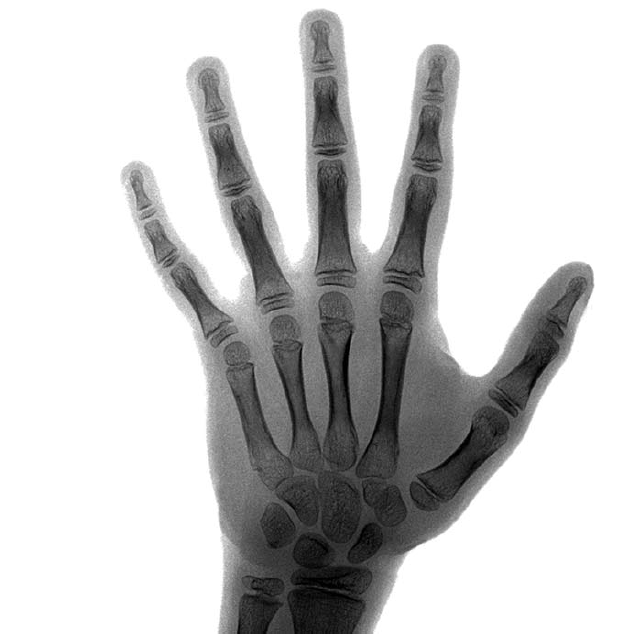

In [7]:
inverted = ImageOps.invert(rtg) # Udelame negativ, ktery potrebujeme pro detekci hran
inverted

In [8]:
hrany = rtg.getbbox() # provedeme detekci hran
hrany

(120, 8, 595, 634)

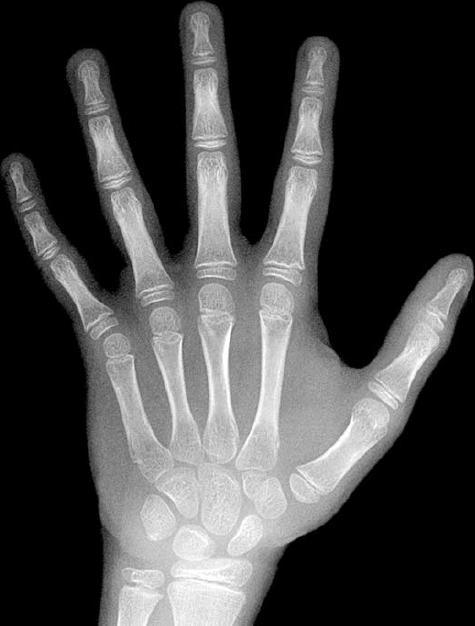

In [9]:
orezany_rtg = rtg.crop(hrany) # Orezeme puvodni obrazek podle detekovanych hran
orezany_rtg

In [10]:
orezany_rtg.size # Nova velikost obrazku

(475, 626)

In [11]:
%matplotlib inline

(array([ 0.0213313 ,  0.000522  ,  0.0011888 ,  0.00158023,  0.0021261 ,
         0.00287032,  0.00326268,  0.00310072,  0.00245212,  0.00078141]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

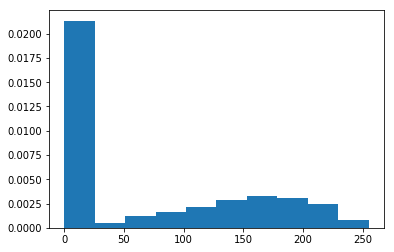

In [12]:
plt.hist(orezany_rtg.getdata(), normed=True) # Vykreslime histogram obrazku